<a href="https://colab.research.google.com/github/Rambimo/PCVK_Ganjil_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

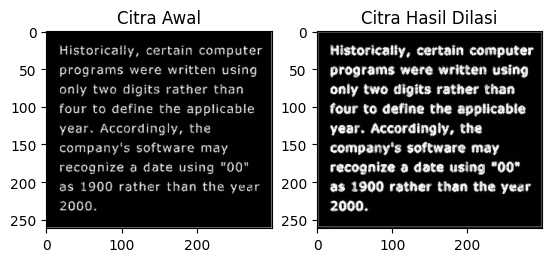

In [3]:
# Fungsi untuk melakukan operasi dilasi pada gambar
def dilasi(image):
    # Mendapatkan dimensi tinggi dan lebar gambar
    height, width = image.shape

    # Inisialisasi matriks hasil dengan nol, dengan tipe data uint8
    result = np.zeros((height, width), dtype=np.uint8)

    # Kernel dilasi yang digunakan, yaitu cross 3x3
    cross = np.array([[0, 1, 0],
                      [1, 1, 1],
                      [0, 1, 0]], dtype=np.uint8)

    # Melakukan iterasi pada setiap piksel dalam gambar
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Mendapatkan ROI (Region of Interest) berukuran 3x3
            roi = image[i - 1:i + 2, j - 1:j + 2]

            # Melakukan operasi dilasi dengan mengambil nilai maksimum dari hasil perkalian ROI dengan kernel
            result[i, j] = np.max(roi * cross)

    return result

# Membaca gambar grayscale dari lokasi tertentu pada Google Drive
image = cv2.imread('/content/drive/MyDrive/PCVK/morphology.png', 0)

# Memanggil fungsi dilasi untuk mendapatkan citra hasil
dilated_image = dilasi(image)

# Menampilkan citra asli dan citra hasil dilasi
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')

plt.subplot(122)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.show()

Structuring Element (SED) berbentuk cross 3x3:
[[0 1 0]
 [1 1 1]
 [0 1 0]]


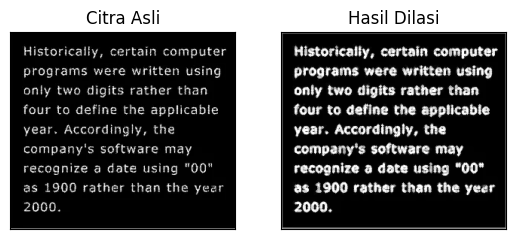

In [4]:
# Membaca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/morphology.png', 0)

# Membuat Structuring Element Dilasi (SED) berbentuk cross 3x3
sed = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Melakukan operasi dilasi menggunakan morphology dari OpenCV
dilated_img = cv2.dilate(img, sed, iterations=1)

# Menampilkan citra asli
plt.subplot(121), plt.imshow(img, 'gray'), plt.title('Citra Asli')
plt.xticks([]), plt.yticks([])

# Menampilkan citra hasil dilasi
plt.subplot(122), plt.imshow(dilated_img, 'gray'), plt.title('Hasil Dilasi')
plt.xticks([]), plt.yticks([])

# Cetak Structuring Element
print("Structuring Element (SED) berbentuk cross 3x3:")
print(sed)

# Menampilkan plot
plt.show()

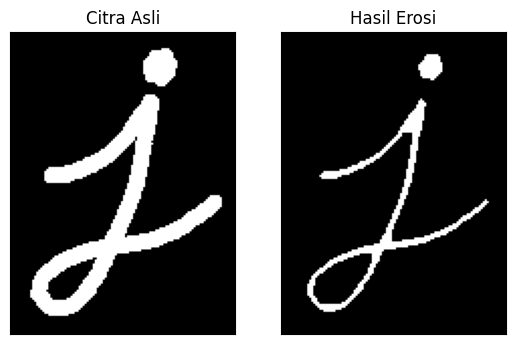

In [5]:
# Membaca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/j.png', 0)

# Fungsi untuk melakukan operasi erosi
def erosi(image):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)

    for i in range(2, height - 2):
        for j in range(2, width - 2):
            # Buat Structuring Element (SE) berbentuk square 5x5 yang terdiri dari nilai 1
            se = np.ones((5, 5), dtype=np.uint8)

            # Region of Interest (ROI) pada citra berukuran 5x5
            roi = image[i - 2:i + 3, j - 2:j + 3]

            # Operasi erosi: Mengambil nilai minimum dari hasil perkalian ROI dengan SE
            result[i, j] = np.min(roi * se)

    return result

# Memanggil fungsi erosi untuk mendapatkan citra hasil erosi
eroded_img = erosi(img)

# Menampilkan citra asli
plt.subplot(121), plt.imshow(img, 'gray'), plt.title('Citra Asli')
plt.xticks([]), plt.yticks([])

# Menampilkan citra hasil erosi
plt.subplot(122), plt.imshow(eroded_img, 'gray'), plt.title('Hasil Erosi')
plt.xticks([]), plt.yticks([])

# Menampilkan plot
plt.show()

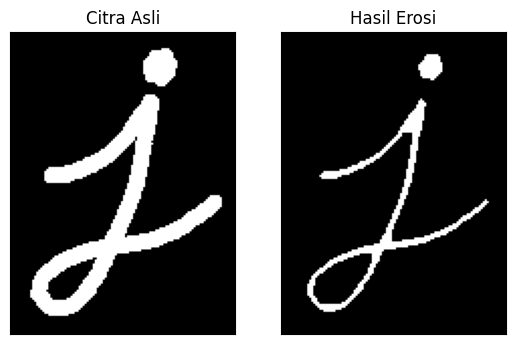

In [6]:
# Membaca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/j.png', 0)

# Membuat Structuring Element Erosi (SE) berbentuk square 5x5
se = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Melakukan operasi erosi menggunakan morphology dari OpenCV
eroded_img = cv2.erode(img, se, iterations=1)

# Menampilkan citra asli
plt.subplot(121), plt.imshow(img, 'gray'), plt.title('Citra Asli')
plt.xticks([]), plt.yticks([])

# Menampilkan citra hasil erosi
plt.subplot(122), plt.imshow(eroded_img, 'gray'), plt.title('Hasil Erosi')
plt.xticks([]), plt.yticks([])

# Menampilkan plot
plt.show()

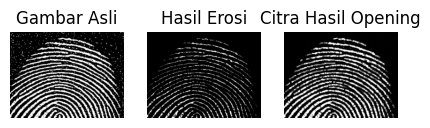

In [7]:
# Baca gambar fingerprint
img = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png', 0)

# Tampilkan gambar asli
plt.figure(figsize=(5, 5))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

# Structuring element berbentuk square 3x3
kernel = np.ones((3, 3), np.uint8)

# Operasi opening
def opening(image, kernel):
    erosion = cv2.erode(image, kernel, iterations=1)
    dilation = cv2.dilate(erosion, kernel, iterations=1)
    return dilation

# Terapkan operasi opening
opened_img = opening(img, kernel)

# Tampilkan hasil erosi
plt.subplot(132)
plt.imshow(cv2.erode(img, kernel, iterations=1), cmap='gray')
plt.title('Hasil Erosi')
plt.axis('off')

# Tampilkan hasil operasi opening
plt.subplot(133)
plt.imshow(opened_img, cmap='gray')
plt.title('Citra Hasil Opening')
plt.axis('off')

# Tampilkan semua gambar
plt.show()

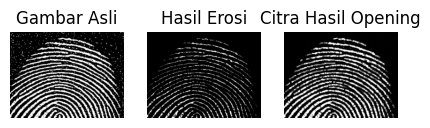

In [8]:
# Baca gambar fingerprint
img = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png', 0)

# Tampilkan gambar asli
plt.figure(figsize=(5, 5))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

# Buat kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Terapkan operasi opening
opened_img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Tampilkan hasil erosi
plt.subplot(132)
plt.imshow(cv2.erode(img, kernel, iterations=1), cmap='gray')
plt.title('Hasil Erosi')
plt.axis('off')

# Tampilkan hasil operasi opening dengan library OpenCV
plt.subplot(133)
plt.imshow(opened_img, cmap='gray')
plt.title('Citra Hasil Opening')
plt.axis('off')

# Tampilkan semua gambar
plt.show()

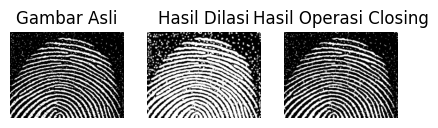

In [9]:
# Baca gambar fingerprint
img = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png', 0)

# Tampilkan gambar asli
plt.figure(figsize=(5, 5))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

# Structuring element berbentuk square 3x3
kernel = np.ones((3, 3), np.uint8)

# Operasi closing
def closing(image, kernel):
    dilation = cv2.dilate(image, kernel, iterations=1)
    erosion = cv2.erode(dilation, kernel, iterations=1)
    return erosion

# Terapkan operasi closing
closed_img = closing(img, kernel)

# Tampilkan hasil dilasi
plt.subplot(132)
plt.imshow(cv2.dilate(img, kernel, iterations=1), cmap='gray')
plt.title('Hasil Dilasi')
plt.axis('off')

# Tampilkan hasil operasi closing
plt.subplot(133)
plt.imshow(closed_img, cmap='gray')
plt.title('Hasil Operasi Closing')
plt.axis('off')

# Tampilkan semua gambar
plt.show()